<a href="https://colab.research.google.com/github/aweeeaja/JST-Neural-Network-/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetV2S

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
train_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/train"
validation_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/validation"
test_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 180),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
import os
import matplotlib.pyplot as plt

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'roses': 615, 'dandelion': 872, 'daisy': 607, 'tulips': 773, 'sunflowers': 673}
Validation set Distribution:
{'daisy': 16, 'sunflowers': 16, 'tulips': 16, 'dandelion': 16, 'roses': 16}


# Percobaan 1

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
emodel = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 51s 215ms/step - loss: 1.0684 - accuracy: 0.5856 - val_loss: 0.7605 - val_accuracy: 0.6875
Epoch 2/20
222/222 [==============================] - 45s 204ms/step - loss: 0.7623 - accuracy: 0.7147 - val_loss: 0.5103 - val_accuracy: 0.8000
Epoch 3/20
222/222 [==============================] - 46s 207ms/step - loss: 0.6812 - accuracy: 0.7528 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 4/20
222/222 [==============================] - 46s 206ms/step - loss: 0.6366 - accuracy: 0.7718 - val_loss: 0.4381 - val_accuracy: 0.8125
Epoch 5/20
222/222 [==============================] - 45s 204ms/step - loss: 0.5929 - accuracy: 0.7853 - val_loss: 0.4216 - val_accuracy: 0.8125
Epoch 6/20
222/222 [==============================] - 45s 201ms/step - loss: 0.5507 - accuracy: 0.8028 - val_loss: 0.5435 - val_accuracy: 0.8125
Epoch 7/20
222/222 [==============================] - 45s 202ms/step - loss: 0.5431 - accuracy: 0.8054 - val_loss: 0.4784 - val_ac

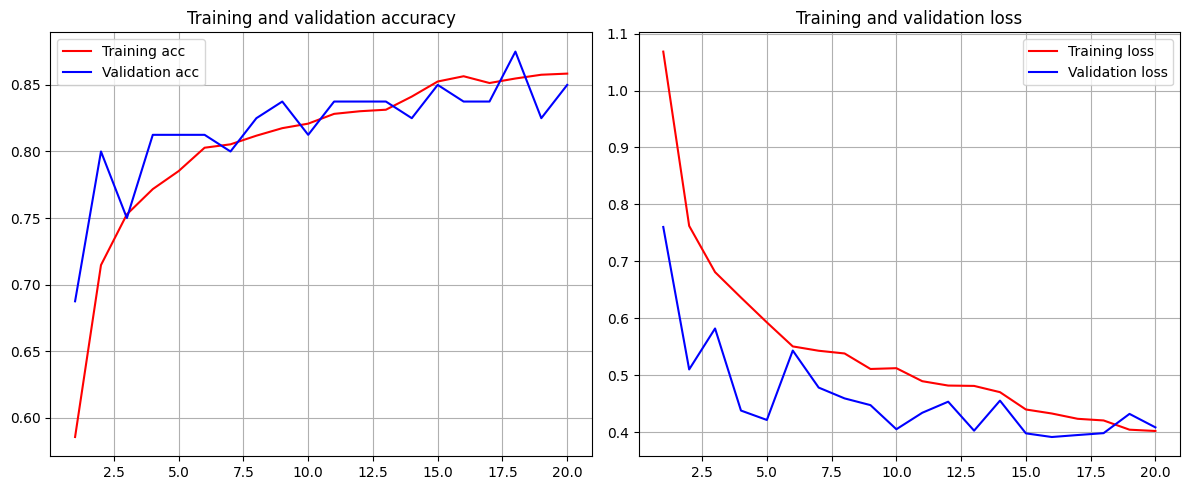

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 9s 3s/step
Akurasi: 82.00%
F1 Score: 81.35%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       0.82      0.90      0.86        10
       roses       0.86      0.60      0.71        10
  sunflowers       0.82      0.90      0.86        10
      tulips       0.88      0.70      0.78        10

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.81        50
weighted avg       0.83      0.82      0.81        50



# Percobaan 2

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 53s 213ms/step - loss: 1.1402 - accuracy: 0.5444 - val_loss: 0.5308 - val_accuracy: 0.7625
Epoch 2/20
222/222 [==============================] - 46s 205ms/step - loss: 0.7857 - accuracy: 0.7107 - val_loss: 0.4906 - val_accuracy: 0.8625
Epoch 3/20
222/222 [==============================] - 46s 207ms/step - loss: 0.6491 - accuracy: 0.7621 - val_loss: 0.4926 - val_accuracy: 0.8125
Epoch 4/20
222/222 [==============================] - 45s 203ms/step - loss: 0.5835 - accuracy: 0.7938 - val_loss: 0.4526 - val_accuracy: 0.8125
Epoch 5/20
222/222 [==============================] - 48s 215ms/step - loss: 0.5248 - accuracy: 0.8107 - val_loss: 0.3793 - val_accuracy: 0.8500
Epoch 6/20
222/222 [==============================] - 45s 204ms/step - loss: 0.5007 - accuracy: 0.8249 - val_loss: 0.4174 - val_accuracy: 0.8500
Epoch 7/20
222/222 [==============================] - 45s 204ms/step - loss: 0.4762 - accuracy: 0.8339 - val_loss: 0.4436 - val_ac

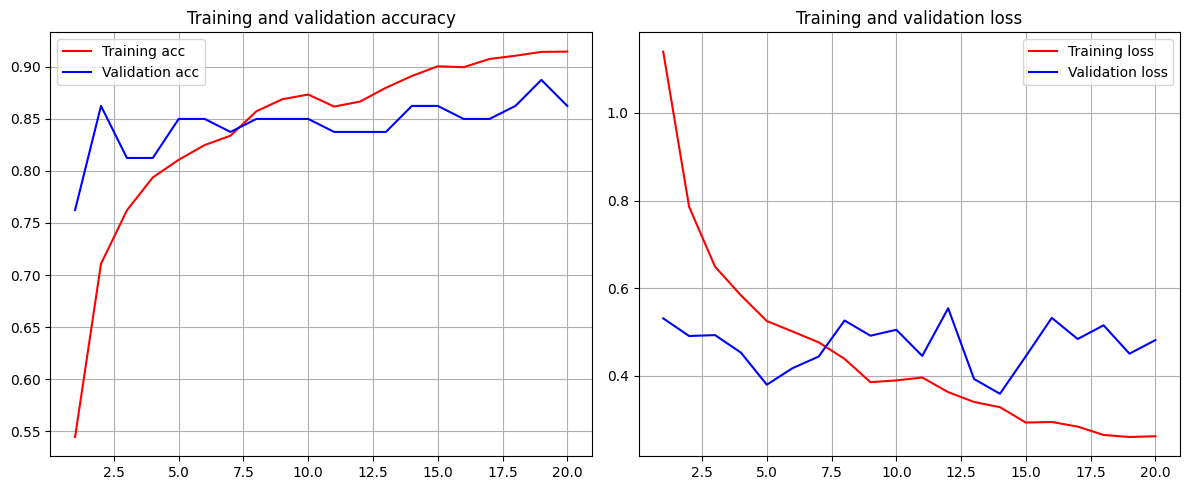

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 2s 119ms/step
Akurasi: 88.00%
F1 Score: 87.87%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       1.00      0.90      0.95        10
       roses       0.80      0.80      0.80        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



# Percobaan 3

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 53s 217ms/step - loss: 1.2890 - accuracy: 0.4811 - val_loss: 0.6542 - val_accuracy: 0.7250
Epoch 2/20
222/222 [==============================] - 47s 213ms/step - loss: 0.7802 - accuracy: 0.7164 - val_loss: 0.5302 - val_accuracy: 0.7875
Epoch 3/20
222/222 [==============================] - 51s 230ms/step - loss: 0.6408 - accuracy: 0.7743 - val_loss: 0.5362 - val_accuracy: 0.7875
Epoch 4/20
222/222 [==============================] - 47s 210ms/step - loss: 0.5852 - accuracy: 0.7983 - val_loss: 0.4524 - val_accuracy: 0.8125
Epoch 5/20
222/222 [==============================] - 48s 216ms/step - loss: 0.5221 - accuracy: 0.8206 - val_loss: 0.4203 - val_accuracy: 0.8625
Epoch 6/20
222/222 [==============================] - 48s 214ms/step - loss: 0.4739 - accuracy: 0.8347 - val_loss: 0.4006 - val_accuracy: 0.8500
Epoch 7/20
222/222 [==============================] - 47s 211ms/step - loss: 0.4551 - accuracy: 0.8463 - val_loss: 0.4762 - val_ac

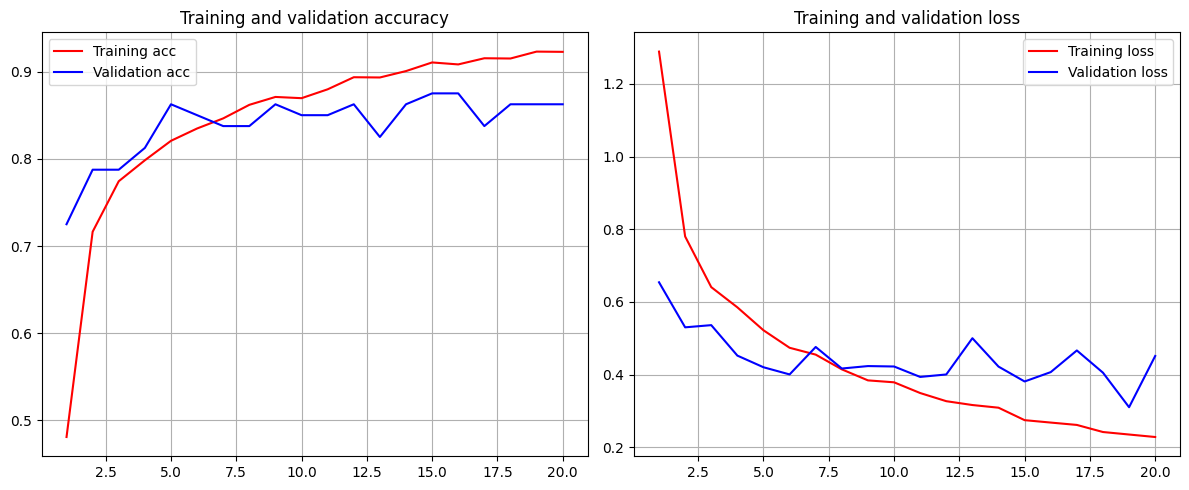

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 90ms/step
Akurasi: 86.00%
F1 Score: 85.66%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.90      0.90      0.90        10
       roses       0.78      0.70      0.74        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



# Percobaan 4

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 73728)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               18874624  
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 53s 214ms/step - loss: 1.2533 - accuracy: 0.4918 - val_loss: 0.7732 - val_accuracy: 0.6875
Epoch 2/20
222/222 [==============================] - 44s 197ms/step - loss: 0.8099 - accuracy: 0.6969 - val_loss: 0.4603 - val_accuracy: 0.8125
Epoch 3/20
222/222 [==============================] - 44s 199ms/step - loss: 0.6496 - accuracy: 0.7718 - val_loss: 0.4240 - val_accuracy: 0.8125
Epoch 4/20
222/222 [==============================] - 45s 203ms/step - loss: 0.5574 - accuracy: 0.8051 - val_loss: 0.3469 - val_accuracy: 0.8750
Epoch 5/20
222/222 [==============================] - 45s 202ms/step - loss: 0.5346 - accuracy: 0.8169 - val_loss: 0.4337 - val_accuracy: 0.8375
Epoch 6/20
222/222 [==============================] - 44s 198ms/step - loss: 0.4750 - accuracy: 0.8412 - val_loss: 0.4679 - val_accuracy: 0.8375
Epoch 7/20
222/222 [==============================] - 44s 197ms/step - loss: 0.4423 - accuracy: 0.8458 - val_loss: 0.4290 - val_ac

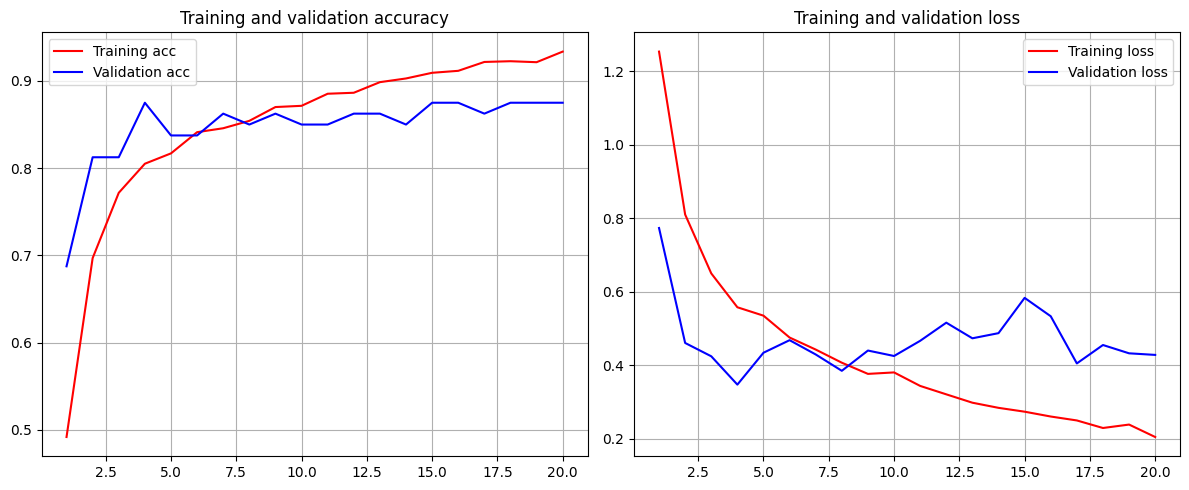

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 54ms/step
Akurasi: 86.00%
F1 Score: 85.66%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.90      0.90      0.90        10
       roses       0.78      0.70      0.74        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



# Percobaan 5

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00002, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               18874624  
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 43s 195ms/step - loss: 0.7375 - accuracy: 0.7246 - val_loss: 0.5671 - val_accuracy: 0.7250
Epoch 2/20
222/222 [==============================] - 43s 194ms/step - loss: 0.7239 - accuracy: 0.7215 - val_loss: 0.5546 - val_accuracy: 0.7250
Epoch 3/20
222/222 [==============================] - 43s 195ms/step - loss: 0.6957 - accuracy: 0.7452 - val_loss: 0.5564 - val_accuracy: 0.7500
Epoch 4/20
222/222 [==============================] - 43s 194ms/step - loss: 0.6755 - accuracy: 0.7449 - val_loss: 0.5254 - val_accuracy: 0.7375
Epoch 5/20
222/222 [==============================] - 44s 196ms/step - loss: 0.6680 - accuracy: 0.7576 - val_loss: 0.5047 - val_accuracy: 0.7625
Epoch 6/20
222/222 [==============================] - 43s 192ms/step - loss: 0.6504 - accuracy: 0.7554 - val_loss: 0.5233 - val_accuracy: 0.7625
Epoch 7/20
222/222 [==============================] - 42s 191ms/step - loss: 0.6451 - accuracy: 0.7585 - val_loss: 0.5207 - val_ac

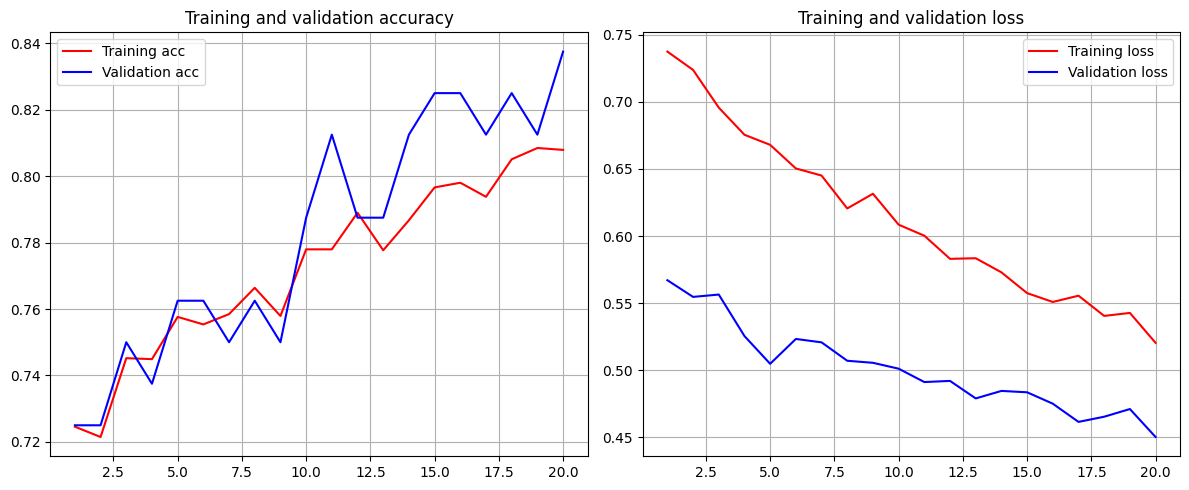

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 2s 62ms/step
Akurasi: 78.00%
F1 Score: 77.06%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.73      0.80      0.76        10
       roses       0.83      0.50      0.62        10
  sunflowers       0.82      0.90      0.86        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.77        50
weighted avg       0.78      0.78      0.77        50



# Percobaan 6

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00002, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 1436s 6s/step - loss: 1.6033 - accuracy: 0.2610 - val_loss: 1.4306 - val_accuracy: 0.5250
Epoch 2/20
222/222 [==============================] - 48s 217ms/step - loss: 1.4684 - accuracy: 0.3621 - val_loss: 1.3486 - val_accuracy: 0.6125
Epoch 3/20
222/222 [==============================] - 48s 215ms/step - loss: 1.3693 - accuracy: 0.4508 - val_loss: 1.2404 - val_accuracy: 0.6375
Epoch 4/20
222/222 [==============================] - 48s 216ms/step - loss: 1.2722 - accuracy: 0.5110 - val_loss: 1.1325 - val_accuracy: 0.6625
Epoch 5/20
222/222 [==============================] - 48s 215ms/step - loss: 1.1701 - accuracy: 0.5621 - val_loss: 1.0322 - val_accuracy: 0.6875
Epoch 6/20
222/222 [==============================] - 48s 216ms/step - loss: 1.0966 - accuracy: 0.6071 - val_loss: 0.9472 - val_accuracy: 0.7250
Epoch 7/20
222/222 [==============================] - 48s 214ms/step - loss: 1.0435 - accuracy: 0.6147 - val_loss: 0.8946 - val_acc

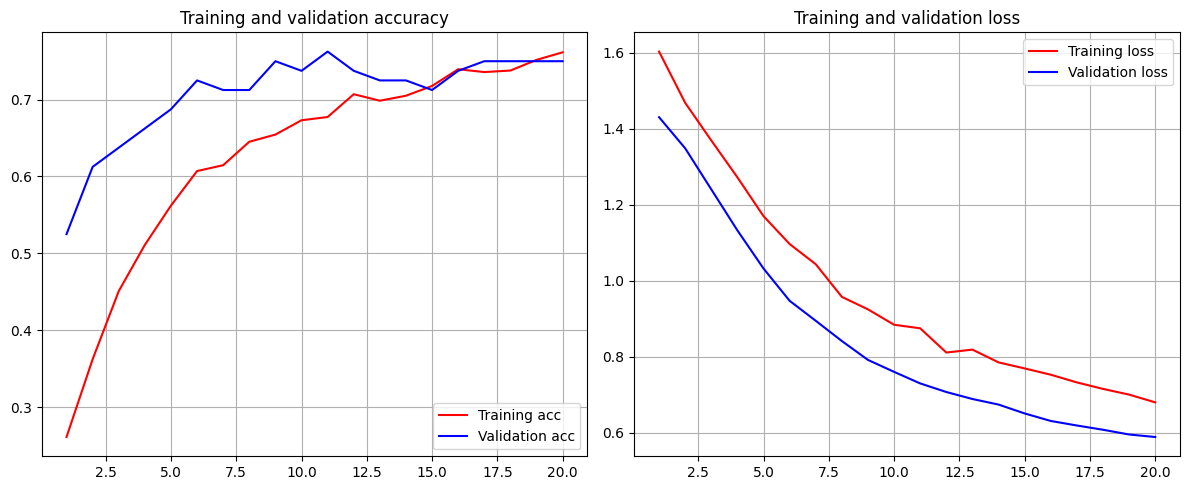

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 59ms/step
Akurasi: 82.00%
F1 Score: 80.94%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       0.90      0.90      0.90        10
       roses       0.83      0.50      0.62        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.81        50
weighted avg       0.82      0.82      0.81        50



# Percobaan 7

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00002, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    )

Epoch 1/30
222/222 [==============================] - 53s 219ms/step - loss: 1.6050 - accuracy: 0.2537 - val_loss: 1.3795 - val_accuracy: 0.5500
Epoch 2/30
222/222 [==============================] - 47s 213ms/step - loss: 1.4845 - accuracy: 0.3605 - val_loss: 1.2897 - val_accuracy: 0.6375
Epoch 3/30
222/222 [==============================] - 47s 212ms/step - loss: 1.3797 - accuracy: 0.4347 - val_loss: 1.1783 - val_accuracy: 0.6750
Epoch 4/30
222/222 [==============================] - 47s 211ms/step - loss: 1.2622 - accuracy: 0.5090 - val_loss: 1.0615 - val_accuracy: 0.6875
Epoch 5/30
222/222 [==============================] - 47s 213ms/step - loss: 1.1759 - accuracy: 0.5475 - val_loss: 0.9711 - val_accuracy: 0.7000
Epoch 6/30
222/222 [==============================] - 47s 211ms/step - loss: 1.1085 - accuracy: 0.5743 - val_loss: 0.8914 - val_accuracy: 0.7000
Epoch 7/30
222/222 [==============================] - 48s 214ms/step - loss: 1.0312 - accuracy: 0.6153 - val_loss: 0.8417 - val_ac

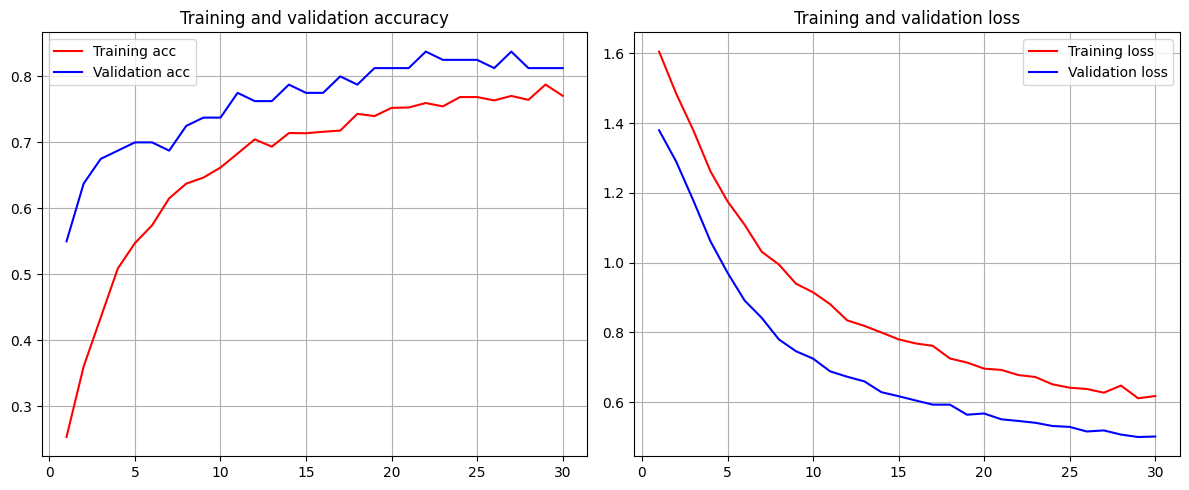

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 2s 123ms/step
Akurasi: 84.00%
F1 Score: 83.22%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.90      0.90      0.90        10
       roses       0.86      0.60      0.71        10
  sunflowers       0.83      1.00      0.91        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.83        50
weighted avg       0.84      0.84      0.83        50



# Percobaan 8

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00002, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    )

Epoch 1/30
222/222 [==============================] - 52s 215ms/step - loss: 1.6835 - accuracy: 0.2226 - val_loss: 1.4880 - val_accuracy: 0.4500
Epoch 2/30
222/222 [==============================] - 48s 216ms/step - loss: 1.6090 - accuracy: 0.2585 - val_loss: 1.4769 - val_accuracy: 0.5625
Epoch 3/30
222/222 [==============================] - 47s 211ms/step - loss: 1.5651 - accuracy: 0.2921 - val_loss: 1.4378 - val_accuracy: 0.5875
Epoch 4/30
222/222 [==============================] - 47s 212ms/step - loss: 1.5212 - accuracy: 0.3206 - val_loss: 1.3803 - val_accuracy: 0.6625
Epoch 5/30
222/222 [==============================] - 47s 212ms/step - loss: 1.4798 - accuracy: 0.3709 - val_loss: 1.3132 - val_accuracy: 0.6750
Epoch 6/30
222/222 [==============================] - 48s 215ms/step - loss: 1.4329 - accuracy: 0.3980 - val_loss: 1.2541 - val_accuracy: 0.6250
Epoch 7/30
222/222 [==============================] - 48s 215ms/step - loss: 1.3882 - accuracy: 0.4308 - val_loss: 1.1842 - val_ac

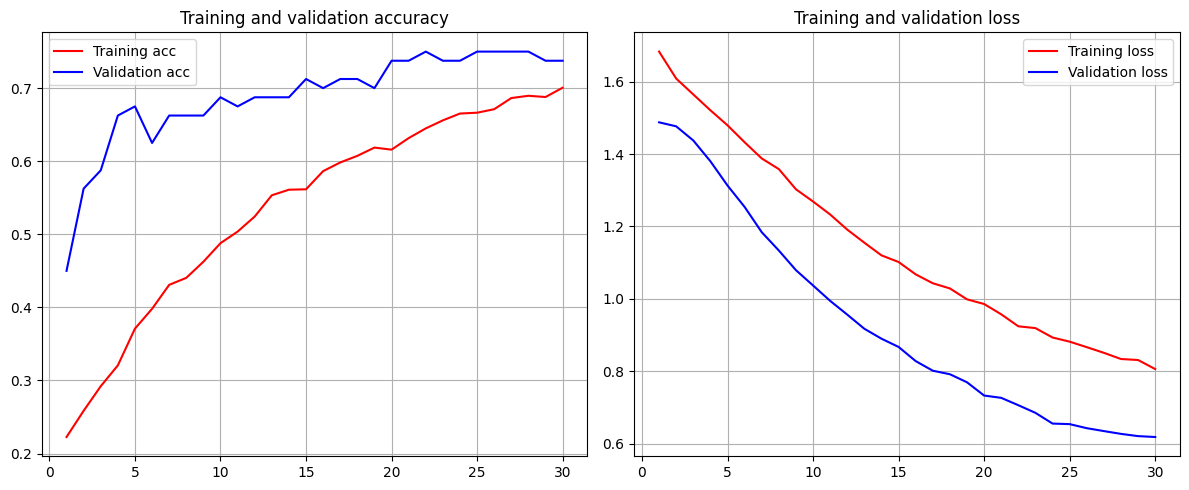

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 85ms/step
Akurasi: 78.00%
F1 Score: 77.65%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.82      0.90      0.86        10
   dandelion       0.69      0.90      0.78        10
       roses       0.86      0.60      0.71        10
  sunflowers       0.80      0.80      0.80        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



# Percobaan 9

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00004, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               18874624  
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=50,
    validation_data=validation_set,
    )

Epoch 1/50
222/222 [==============================] - 51s 211ms/step - loss: 1.6448 - accuracy: 0.2469 - val_loss: 1.4481 - val_accuracy: 0.5375
Epoch 2/50
222/222 [==============================] - 46s 209ms/step - loss: 1.5450 - accuracy: 0.3138 - val_loss: 1.3798 - val_accuracy: 0.5625
Epoch 3/50
222/222 [==============================] - 48s 215ms/step - loss: 1.4566 - accuracy: 0.3763 - val_loss: 1.2729 - val_accuracy: 0.6125
Epoch 4/50
222/222 [==============================] - 48s 215ms/step - loss: 1.3688 - accuracy: 0.4458 - val_loss: 1.1668 - val_accuracy: 0.6625
Epoch 5/50
222/222 [==============================] - 46s 209ms/step - loss: 1.3021 - accuracy: 0.4737 - val_loss: 1.0665 - val_accuracy: 0.7000
Epoch 6/50
222/222 [==============================] - 47s 212ms/step - loss: 1.2323 - accuracy: 0.5141 - val_loss: 0.9865 - val_accuracy: 0.7125
Epoch 7/50
222/222 [==============================] - 46s 208ms/step - loss: 1.1497 - accuracy: 0.5452 - val_loss: 0.8991 - val_ac

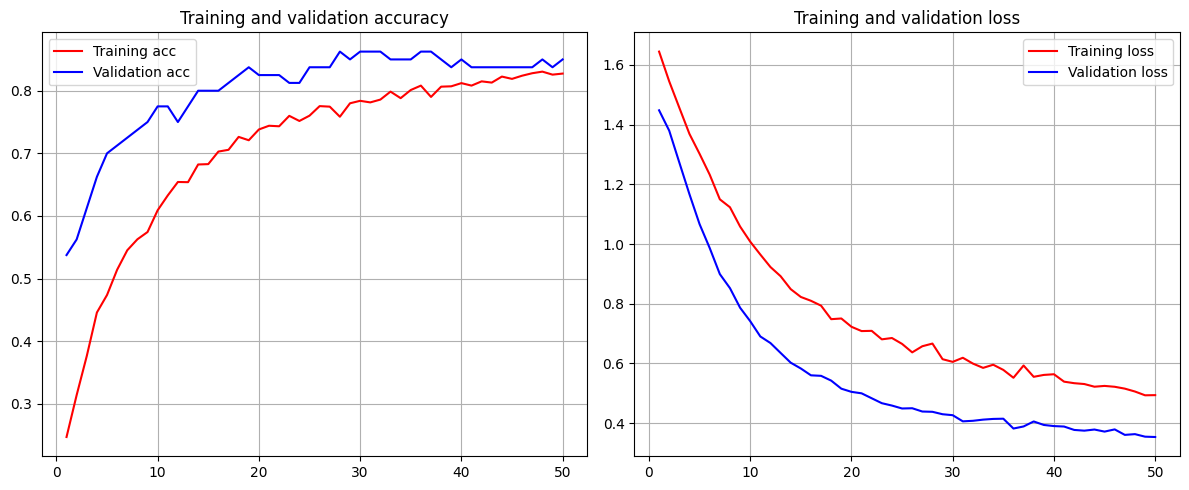

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 62ms/step
Akurasi: 84.00%
F1 Score: 83.22%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.90      0.90      0.90        10
       roses       0.78      0.70      0.74        10
  sunflowers       0.83      1.00      0.91        10
      tulips       0.86      0.60      0.71        10

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.83        50
weighted avg       0.84      0.84      0.83        50



# Percobaan 10

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = EfficientNetV2S(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

82420632/82420632 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 6, 6, 1280)        20331360  
 al)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 46080)             0         
                                                                 
 dense_18 (Dense)            (None, 5)                 230405    
                                                                 
Total params: 20561765 (78.44 MB)
Trainable params: 20407893 (77.85 MB)
Non-trainable params: 153872 (601.06 KB)
_________________________________________________________________


In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 124s 306ms/step - loss: 0.7807 - accuracy: 0.6992 - val_loss: 0.4772 - val_accuracy: 0.8500
Epoch 2/20
222/222 [==============================] - 60s 272ms/step - loss: 0.4211 - accuracy: 0.8534 - val_loss: 0.2982 - val_accuracy: 0.9125
Epoch 3/20
222/222 [==============================] - 60s 267ms/step - loss: 0.3225 - accuracy: 0.8811 - val_loss: 0.2238 - val_accuracy: 0.8750
Epoch 4/20
222/222 [==============================] - 60s 271ms/step - loss: 0.2397 - accuracy: 0.9127 - val_loss: 0.2357 - val_accuracy: 0.9250
Epoch 5/20
222/222 [==============================] - 60s 272ms/step - loss: 0.2122 - accuracy: 0.9223 - val_loss: 0.1939 - val_accuracy: 0.9375
Epoch 6/20
222/222 [==============================] - 61s 274ms/step - loss: 0.1689 - accuracy: 0.9390 - val_loss: 0.3351 - val_accuracy: 0.9000
Epoch 7/20
222/222 [==============================] - 61s 274ms/step - loss: 0.1528 - accuracy: 0.9466 - val_loss: 0.2429 - val_a

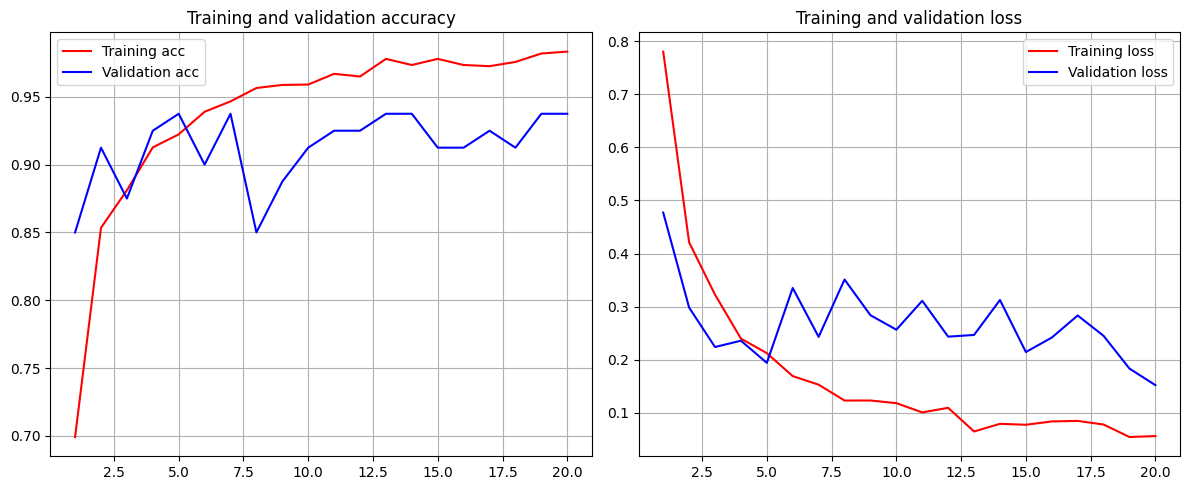

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 67ms/step
Akurasi: 86.00%
F1 Score: 85.71%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       1.00      0.90      0.95        10
       roses       0.86      0.60      0.71        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.67      0.80      0.73        10

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



# Percobaan 11

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_19 (Dense)            (None, 256)               18874624  
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               131584    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 51s 209ms/step - loss: 1.2178 - accuracy: 0.5121 - val_loss: 0.6274 - val_accuracy: 0.7375
Epoch 2/20
222/222 [==============================] - 47s 212ms/step - loss: 0.7931 - accuracy: 0.7008 - val_loss: 0.4863 - val_accuracy: 0.7875
Epoch 3/20
222/222 [==============================] - 46s 205ms/step - loss: 0.6482 - accuracy: 0.7602 - val_loss: 0.4261 - val_accuracy: 0.8375
Epoch 4/20
222/222 [==============================] - 46s 206ms/step - loss: 0.5780 - accuracy: 0.7944 - val_loss: 0.3965 - val_accuracy: 0.8500
Epoch 5/20
222/222 [==============================] - 46s 205ms/step - loss: 0.5295 - accuracy: 0.8155 - val_loss: 0.3014 - val_accuracy: 0.8875
Epoch 6/20
222/222 [==============================] - 47s 210ms/step - loss: 0.4764 - accuracy: 0.8322 - val_loss: 0.2828 - val_accuracy: 0.8875
Epoch 7/20
222/222 [==============================] - 45s 205ms/step - loss: 0.4622 - accuracy: 0.8342 - val_loss: 0.3152 - val_ac

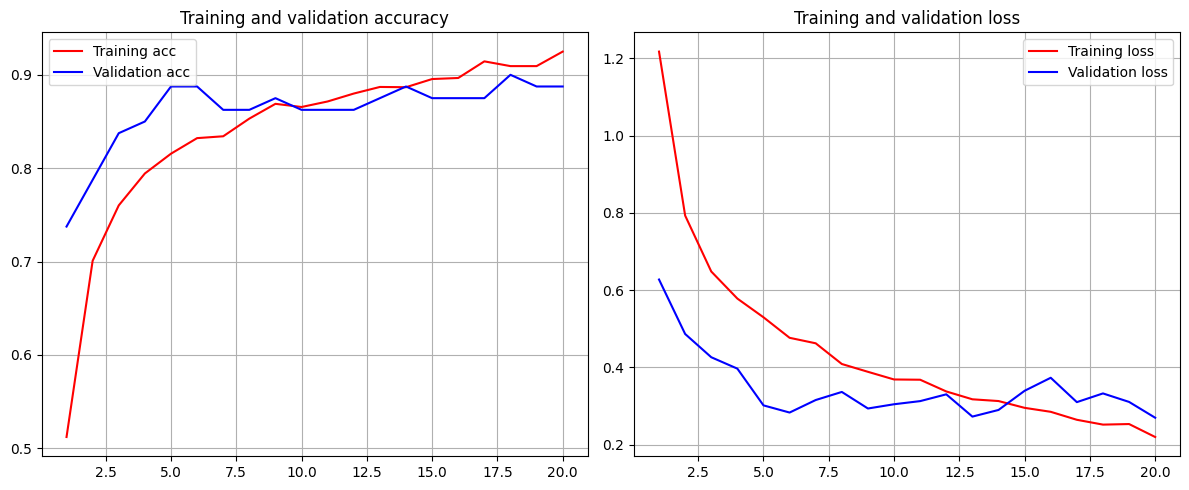

In [ ]:
visualize(xception2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 60ms/step
Akurasi: 82.00%
F1 Score: 81.44%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.89      0.80      0.84        10
       roses       0.78      0.70      0.74        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.67      0.60      0.63        10

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.81        50
weighted avg       0.82      0.82      0.81        50



# Percobaan 12

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 763s 3s/step - loss: 1.2071 - accuracy: 0.5172 - val_loss: 0.5663 - val_accuracy: 0.8250
Epoch 2/20
222/222 [==============================] - 52s 234ms/step - loss: 0.7078 - accuracy: 0.7452 - val_loss: 0.3587 - val_accuracy: 0.8875
Epoch 3/20
222/222 [==============================] - 54s 243ms/step - loss: 0.5677 - accuracy: 0.7986 - val_loss: 0.3626 - val_accuracy: 0.9000
Epoch 4/20
222/222 [==============================] - 52s 233ms/step - loss: 0.4709 - accuracy: 0.8356 - val_loss: 0.3415 - val_accuracy: 0.9250
Epoch 5/20
222/222 [==============================] - 54s 241ms/step - loss: 0.3980 - accuracy: 0.8636 - val_loss: 0.3369 - val_accuracy: 0.9250
Epoch 6/20
222/222 [==============================] - 53s 236ms/step - loss: 0.3648 - accuracy: 0.8743 - val_loss: 0.3175 - val_accuracy: 0.9250
Epoch 7/20
222/222 [==============================] - 52s 236ms/step - loss: 0.3305 - accuracy: 0.8907 - val_loss: 0.2620 - val_accu

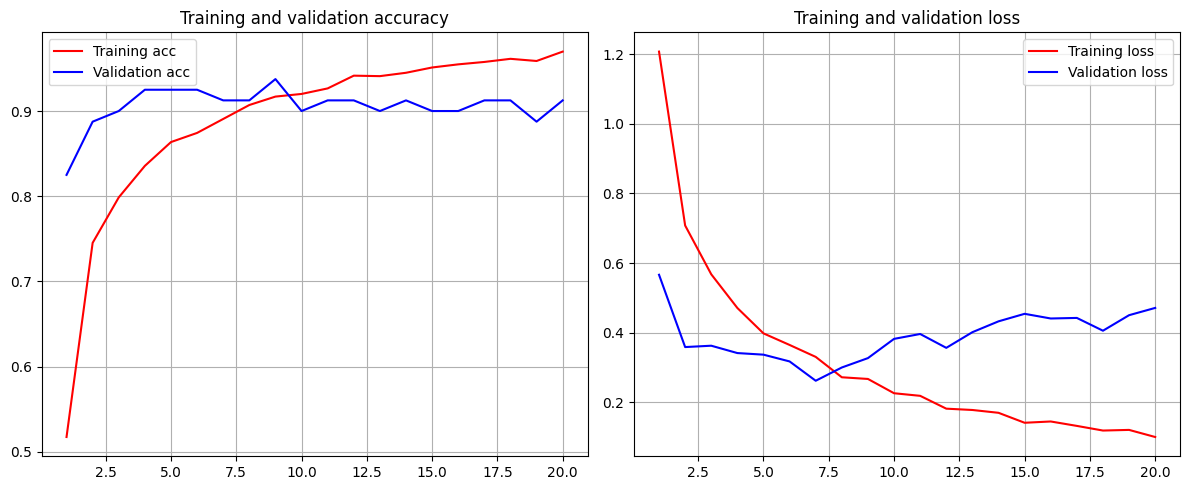

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 9s 3s/step
Akurasi: 86.00%
F1 Score: 85.78%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.90      0.90      0.90        10
       roses       0.80      0.80      0.80        10
  sunflowers       0.90      0.90      0.90        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



# Percobaan 13

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=10,
    validation_data=validation_set,
    )

Epoch 1/10
222/222 [==============================] - 69s 239ms/step - loss: 1.1333 - accuracy: 0.5427 - val_loss: 0.5066 - val_accuracy: 0.8125
Epoch 2/10
222/222 [==============================] - 54s 242ms/step - loss: 0.6207 - accuracy: 0.7825 - val_loss: 0.3920 - val_accuracy: 0.8625
Epoch 3/10
222/222 [==============================] - 53s 236ms/step - loss: 0.4911 - accuracy: 0.8322 - val_loss: 0.3744 - val_accuracy: 0.9000
Epoch 4/10
222/222 [==============================] - 52s 235ms/step - loss: 0.3955 - accuracy: 0.8647 - val_loss: 0.4203 - val_accuracy: 0.9125
Epoch 5/10
222/222 [==============================] - 54s 242ms/step - loss: 0.3371 - accuracy: 0.8915 - val_loss: 0.3249 - val_accuracy: 0.9125
Epoch 6/10
222/222 [==============================] - 53s 237ms/step - loss: 0.2928 - accuracy: 0.9073 - val_loss: 0.3026 - val_accuracy: 0.9250
Epoch 7/10
222/222 [==============================] - 54s 244ms/step - loss: 0.2648 - accuracy: 0.9178 - val_loss: 0.3279 - val_ac

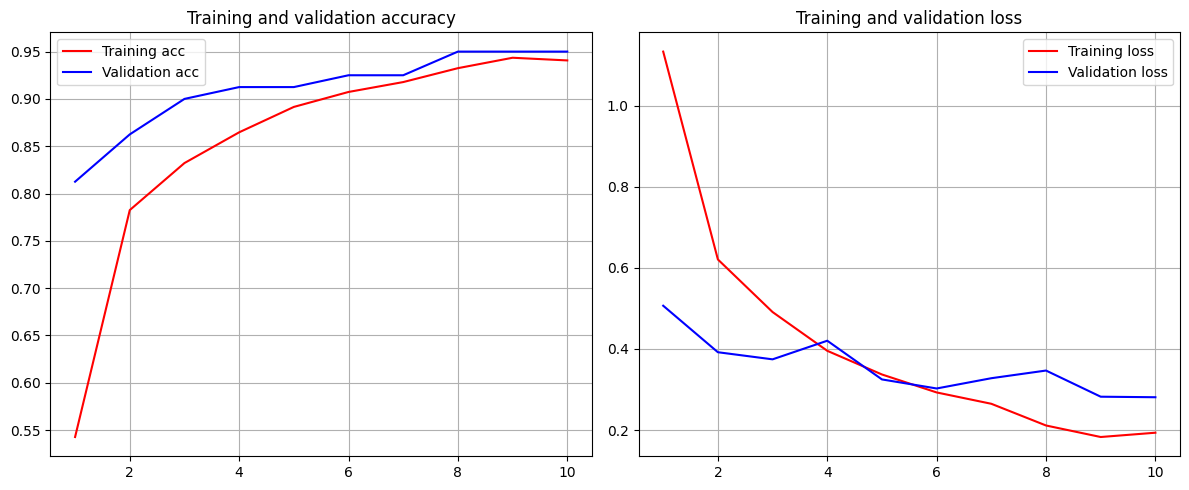

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 66ms/step
Akurasi: 88.00%
F1 Score: 87.77%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.82      0.90      0.86        10
       roses       0.89      0.80      0.84        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



# Percobaan 14

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=10,
    validation_data=validation_set,
    )

Epoch 1/10
222/222 [==============================] - 75s 265ms/step - loss: 1.5263 - accuracy: 0.3458 - val_loss: 0.8879 - val_accuracy: 0.7000
Epoch 2/10
222/222 [==============================] - 54s 242ms/step - loss: 1.0439 - accuracy: 0.5794 - val_loss: 0.4826 - val_accuracy: 0.8250
Epoch 3/10
222/222 [==============================] - 53s 237ms/step - loss: 0.7027 - accuracy: 0.7345 - val_loss: 0.3835 - val_accuracy: 0.8750
Epoch 4/10
222/222 [==============================] - 54s 244ms/step - loss: 0.5482 - accuracy: 0.8079 - val_loss: 0.3381 - val_accuracy: 0.9000
Epoch 5/10
222/222 [==============================] - 54s 242ms/step - loss: 0.4890 - accuracy: 0.8398 - val_loss: 0.3495 - val_accuracy: 0.9500
Epoch 6/10
222/222 [==============================] - 53s 236ms/step - loss: 0.4049 - accuracy: 0.8672 - val_loss: 0.3527 - val_accuracy: 0.8750
Epoch 7/10
222/222 [==============================] - 53s 236ms/step - loss: 0.3605 - accuracy: 0.8850 - val_loss: 0.3963 - val_ac

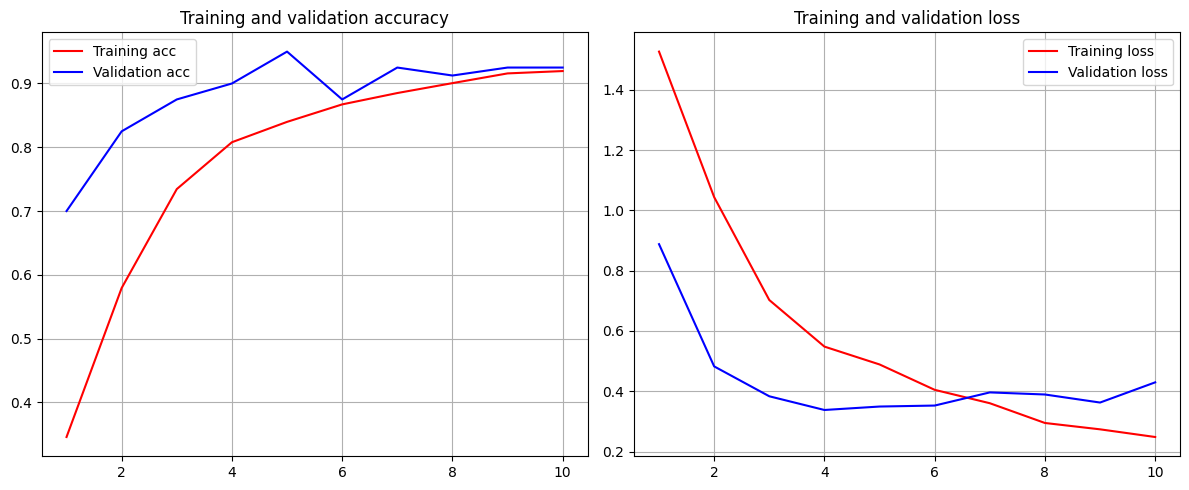

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 65ms/step
Akurasi: 92.00%
F1 Score: 91.89%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.90      0.90      0.90        10
       roses       0.90      0.90      0.90        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.89      0.80      0.84        10

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



# Percobaan 15

In [ ]:
train_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/train"
validation_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/validation"
test_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 627s 3s/step - loss: 1.4611 - accuracy: 0.3619 - val_loss: 0.9737 - val_accuracy: 0.6625
Epoch 2/20
222/222 [==============================] - 75s 336ms/step - loss: 0.9261 - accuracy: 0.6517 - val_loss: 0.3545 - val_accuracy: 0.8750
Epoch 3/20
222/222 [==============================] - 75s 337ms/step - loss: 0.5981 - accuracy: 0.8006 - val_loss: 0.2374 - val_accuracy: 0.9375
Epoch 4/20
222/222 [==============================] - 74s 335ms/step - loss: 0.4426 - accuracy: 0.8523 - val_loss: 0.2190 - val_accuracy: 0.9500
Epoch 5/20
222/222 [==============================] - 75s 336ms/step - loss: 0.3618 - accuracy: 0.8876 - val_loss: 0.2031 - val_accuracy: 0.9625
Epoch 6/20
222/222 [==============================] - 75s 339ms/step - loss: 0.2847 - accuracy: 0.9124 - val_loss: 0.2285 - val_accuracy: 0.9500
Epoch 7/20
222/222 [==============================] - 75s 336ms/step - loss: 0.2661 - accuracy: 0.9206 - val_loss: 0.1880 - val_accu

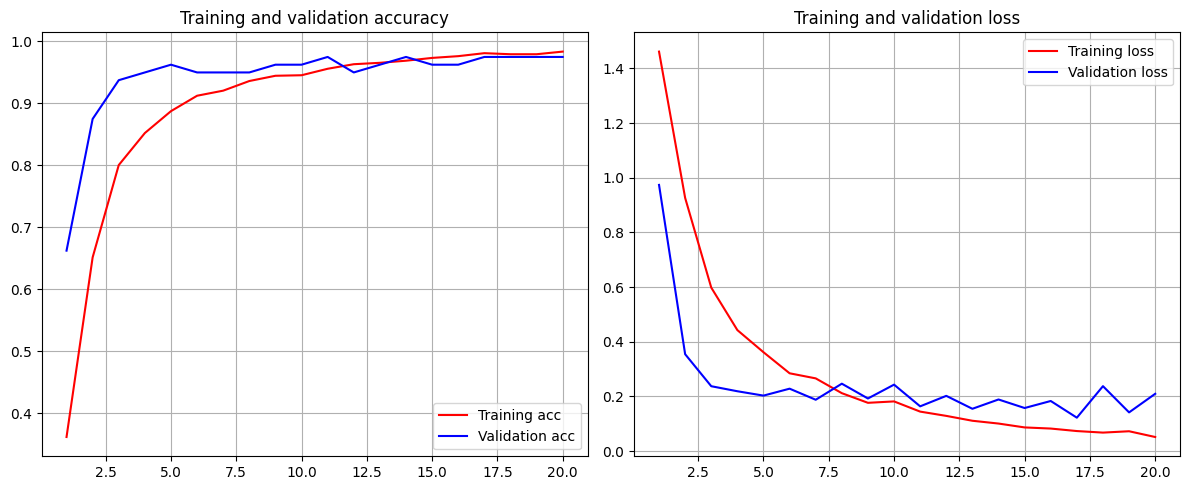

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 8s 2s/step
Akurasi: 90.00%
F1 Score: 90.08%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       1.00      0.90      0.95        10
       roses       0.89      0.80      0.84        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.73      0.80      0.76        10

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



# Percobaan 16

In [ ]:
train_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/train"
validation_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/validation"
test_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=10,
    validation_data=validation_set,
    )

Epoch 1/10
222/222 [==============================] - 91s 339ms/step - loss: 1.5308 - accuracy: 0.3121 - val_loss: 1.1145 - val_accuracy: 0.6625
Epoch 2/10
222/222 [==============================] - 74s 333ms/step - loss: 1.1438 - accuracy: 0.5277 - val_loss: 0.6088 - val_accuracy: 0.7750
Epoch 3/10
222/222 [==============================] - 74s 333ms/step - loss: 0.8210 - accuracy: 0.6921 - val_loss: 0.3532 - val_accuracy: 0.8750
Epoch 4/10
222/222 [==============================] - 75s 339ms/step - loss: 0.6182 - accuracy: 0.7726 - val_loss: 0.3431 - val_accuracy: 0.9125
Epoch 5/10
222/222 [==============================] - 74s 333ms/step - loss: 0.5389 - accuracy: 0.8184 - val_loss: 0.2459 - val_accuracy: 0.9625
Epoch 6/10
222/222 [==============================] - 74s 334ms/step - loss: 0.4458 - accuracy: 0.8520 - val_loss: 0.2556 - val_accuracy: 0.9500
Epoch 7/10
222/222 [==============================] - 74s 334ms/step - loss: 0.3893 - accuracy: 0.8737 - val_loss: 0.2393 - val_ac

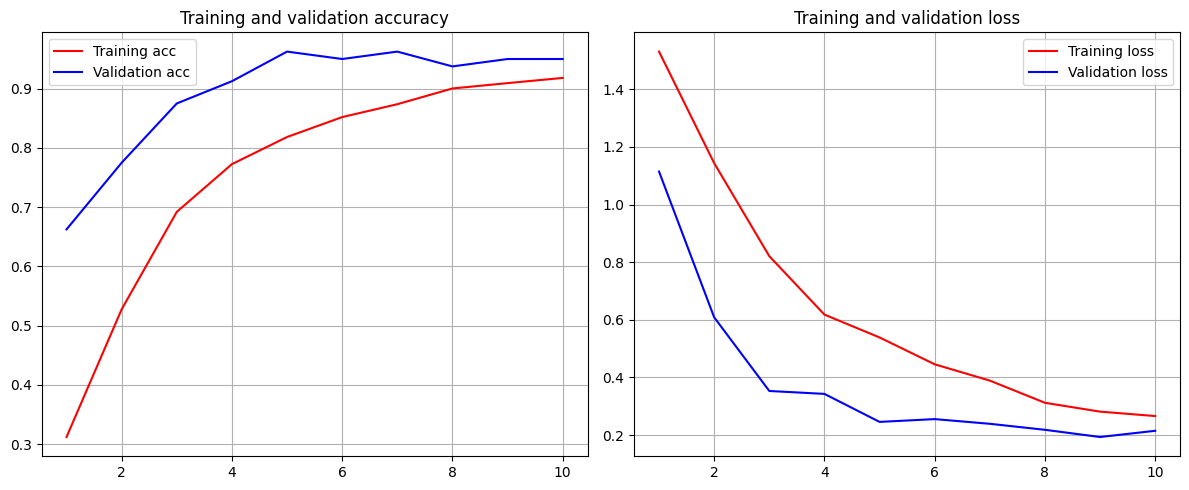

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 78ms/step
Akurasi: 82.00%
F1 Score: 81.19%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.90      0.90      0.90        10
       roses       0.71      0.50      0.59        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.64      0.70      0.67        10

    accuracy                           0.82        50
   macro avg       0.81      0.82      0.81        50
weighted avg       0.81      0.82      0.81        50



# Percobaan 17

In [ ]:
train_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/train"
validation_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/validation"
test_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_3 (Flatten)         (None, 204800)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               52429056  
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=15,
    validation_data=validation_set,
    )

Epoch 1/15
222/222 [==============================] - 158s 594ms/step - loss: 1.4091 - accuracy: 0.4322 - val_loss: 0.5000 - val_accuracy: 0.8875
Epoch 2/15
222/222 [==============================] - 132s 594ms/step - loss: 0.6943 - accuracy: 0.7395 - val_loss: 0.2079 - val_accuracy: 0.9625
Epoch 3/15
222/222 [==============================] - 125s 562ms/step - loss: 0.4393 - accuracy: 0.8497 - val_loss: 0.2427 - val_accuracy: 0.9375
Epoch 4/15
222/222 [==============================] - 126s 566ms/step - loss: 0.3225 - accuracy: 0.9017 - val_loss: 0.2165 - val_accuracy: 0.9375
Epoch 5/15
222/222 [==============================] - 128s 574ms/step - loss: 0.2587 - accuracy: 0.9215 - val_loss: 0.2032 - val_accuracy: 0.9250
Epoch 6/15
222/222 [==============================] - 126s 566ms/step - loss: 0.1874 - accuracy: 0.9460 - val_loss: 0.3167 - val_accuracy: 0.9375
Epoch 7/15
222/222 [==============================] - 128s 574ms/step - loss: 0.1598 - accuracy: 0.9554 - val_loss: 0.2334 -

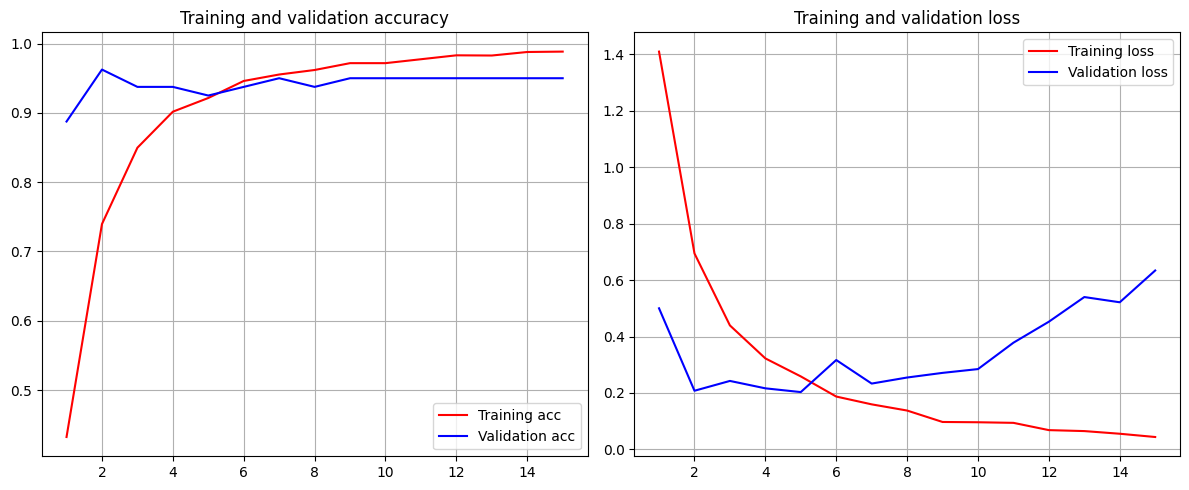

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 127ms/step
Akurasi: 90.00%
F1 Score: 90.08%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       1.00      0.90      0.95        10
       roses       0.89      0.80      0.84        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.73      0.80      0.76        10

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



# Percobaan 18

In [ ]:
train_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/train"
validation_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/validation"
test_dir = "/content/gdrive/MyDrive/JST/datasets/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 256)               52429056  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [ ]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [ ]:
xception1 = model.fit(
    train_set,
    epochs=15,
    validation_data=validation_set,
    )

Epoch 1/15
222/222 [==============================] - 634s 3s/step - loss: 0.9068 - accuracy: 0.6605 - val_loss: 0.2898 - val_accuracy: 0.9250
Epoch 2/15
222/222 [==============================] - 124s 556ms/step - loss: 0.4653 - accuracy: 0.8435 - val_loss: 0.2372 - val_accuracy: 0.9375
Epoch 3/15
222/222 [==============================] - 123s 555ms/step - loss: 0.3535 - accuracy: 0.8777 - val_loss: 0.2226 - val_accuracy: 0.9375
Epoch 4/15
222/222 [==============================] - 124s 556ms/step - loss: 0.2769 - accuracy: 0.9031 - val_loss: 0.2056 - val_accuracy: 0.9625
Epoch 5/15
222/222 [==============================] - 124s 560ms/step - loss: 0.2508 - accuracy: 0.9164 - val_loss: 0.1925 - val_accuracy: 0.9625
Epoch 6/15
222/222 [==============================] - 125s 562ms/step - loss: 0.2038 - accuracy: 0.9288 - val_loss: 0.1974 - val_accuracy: 0.9750
Epoch 7/15
222/222 [==============================] - 123s 555ms/step - loss: 0.1887 - accuracy: 0.9367 - val_loss: 0.2179 - va

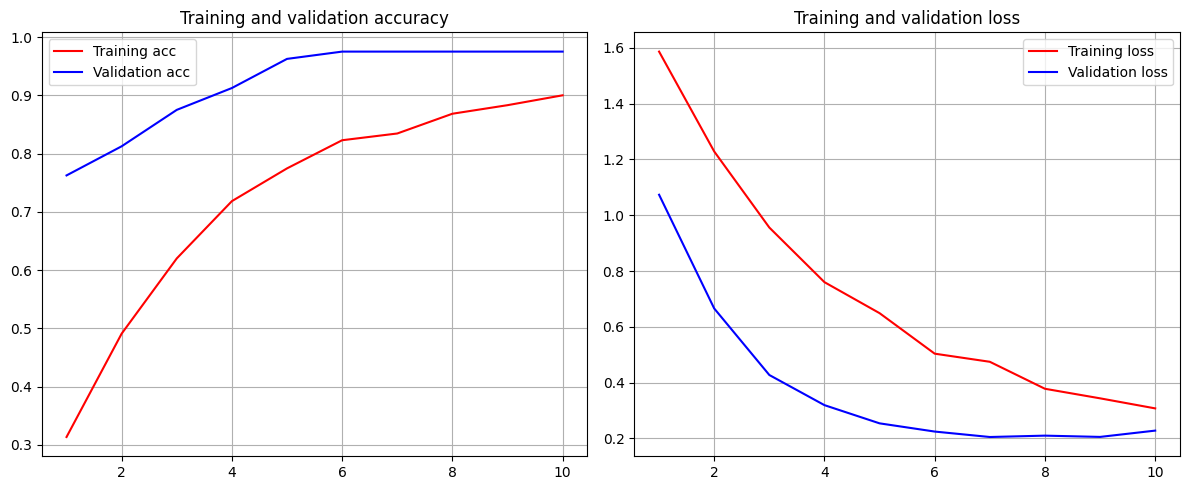

In [ ]:
visualize(xception1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 151ms/step
Akurasi: 88.00%
F1 Score: 87.97%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       1.00      0.90      0.95        10
       roses       0.89      0.80      0.84        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

